In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
from math import sqrt, pi, log2
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
def show_image(image):
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

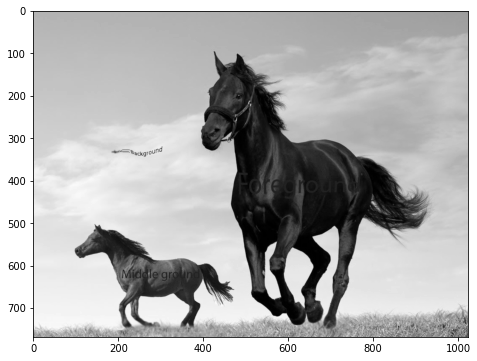

In [305]:
image = cv2.imread('temp2.jpg', 0)
show_image(image)

In [306]:
image.shape

(768, 1024)

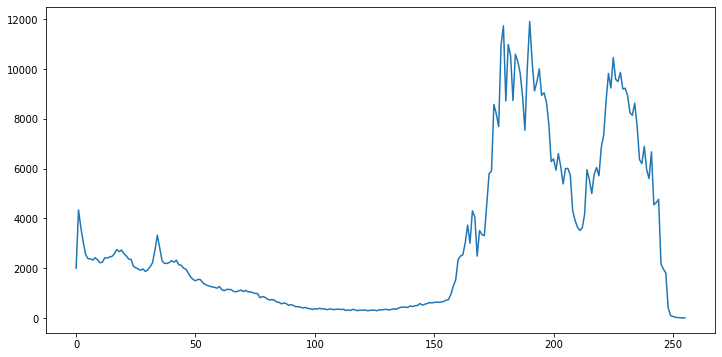

In [295]:
plt.plot(cv2.calcHist([image], [0], None, [256], [0, 256])) 
plt.show()

In [296]:
def get_u(image, threshold, background):
    if background:
        return cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()[threshold:].argmax() + threshold
    else:
        return cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()[:threshold].argmax()

In [297]:
start_th = 125 # expreimental based on the histogram
u_o, u_b = get_u(image, start_th, False), get_u(image, start_th, True)
u_o, u_b

(1, 190)

In [298]:
sigma_o = 1 / (sqrt(2 * pi) * u_o)
sigma_b = 1 / (sqrt(2 * pi) * u_b)
sigma_o, sigma_b

(0.3989422804014327, 0.0020996962126391197)

In [299]:
A_o = cv2.calcHist([np.where(image < start_th, 0, image)], [0], None, [256], [0, 256]).flatten()[1:].max()
A_b = cv2.calcHist([np.where(image > start_th, 0, image)], [0], None, [256], [0, 256]).flatten()[1:].max()
A_o, A_b

(11909.0, 4340.0)

In [300]:
theta = (sigma_o * A_o) / (sigma_o * A_o + sigma_b * A_b)
theta

0.9980856178734479

In [301]:
threshold = (u_o + u_b) / 2 - ((sigma_o ** 2 + sigma_b ** 2) / (u_b - u_o)) * log2((1 - theta) / theta)

In [302]:
threshold

95.50760103037412

In [303]:
new = np.where(image > threshold, 255, image)

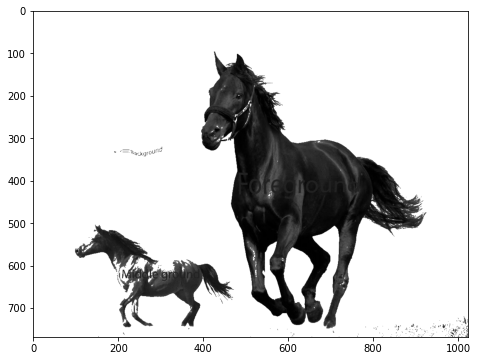

In [304]:
show_image(new)